In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('FINAL_DATASET.csv')
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,latitude,longitude,weather_tempmax,weather_tempmin,weather_temp,weather_feelslikemax,weather_feelslikemin,...,Activity_Snowmobiling,Activity_Snowshoeing,Activity_Suicide,Activity_Swimming,Activity_Undetermined,Activity_Vessel Related,Activity_Wading,Activity_Walking,Activity_Wildlife watching,Cause of Death
0,0,1,1.0,37.849927,-122.517752,59.6,41.2,49.0,59.6,37.4,...,False,False,False,False,False,True,False,False,False,Drowning
1,1,2,2.0,37.849927,-122.517752,59.6,41.2,49.0,59.6,37.4,...,False,False,False,False,False,True,False,False,False,Undetermined
2,2,3,3.0,32.007155,-90.858514,45.3,21.7,34.4,42.3,21.7,...,False,False,False,False,False,False,False,False,False,Motor Vehicle Crash
3,3,4,4.0,32.007155,-90.858514,45.3,21.7,34.4,42.3,21.7,...,False,False,False,False,False,False,False,False,False,Motor Vehicle Crash
4,4,5,5.0,40.598479,-73.857927,26.0,13.9,19.6,13.8,1.0,...,False,False,False,False,False,False,False,False,False,Undetermined


In [3]:
columns_to_keep = [col for col in df.columns if not (col.startswith('Unnamed:') or col.startswith('Activity'))]

df = df[columns_to_keep]

# Remove classes with fewer than 20 observations
min_observations = 20
df = df.groupby('Cause of Death').filter(lambda x: len(x) >= min_observations)





In [5]:
#For all classes

y = pd.DataFrame(df['Cause of Death'])

X = df.drop(columns=[col for col in df.columns if col.startswith('Cause of Death')], errors='ignore')
X = X.drop(columns=[col for col in X.columns if col.startswith('Death')], errors='ignore')

print(X.shape)
print(y)

# Display unique classes in the original target variable
print("Original target variable (y):")
print(y.value_counts())  # Assuming y is a pandas Series



(4442, 529)
           Cause of Death
0                Drowning
1            Undetermined
2     Motor Vehicle Crash
3     Motor Vehicle Crash
4            Undetermined
...                   ...
4540  Motor Vehicle Crash
4541  Motor Vehicle Crash
4542              Suicide
4543         Undetermined
4544         Undetermined

[4442 rows x 1 columns]
Original target variable (y):
Cause of Death                        
Drowning                                  844
Motor Vehicle Crash                       820
Suicide                                   642
Undetermined                              585
Fall                                      489
Medical - During physical activity        317
Medical - Not during physical activity    237
Medical - Unknown                          82
Hyperthermia                               80
Homicide                                   50
Aircraft incident                          46
Hypothermia                                44
Avalanche                     

In [6]:

# Display unique classes in the original target variable
print("Original target variable (y):")
print(y.value_counts())  # Assuming y is a pandas Series


Original target variable (y):
Cause of Death                        
Drowning                                  844
Motor Vehicle Crash                       820
Suicide                                   642
Undetermined                              585
Fall                                      489
Medical - During physical activity        317
Medical - Not during physical activity    237
Medical - Unknown                          82
Hyperthermia                               80
Homicide                                   50
Aircraft incident                          46
Hypothermia                                44
Avalanche                                  41
Vessel Incident                            31
Aircraft Incident                          26
Poisoning - drugs                          24
Bicycle only crash                         22
Poisoning - Drugs                          21
Falling tree/branch                        21
Rockfall                                   20
Name: count

In [7]:
# Encode all non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object', 'category']).columns
print(f"Non-numerical columns detected: {list(non_numeric_columns)}")

df_encoded = pd.get_dummies(df, columns=non_numeric_columns, drop_first=True)
print("Shape of DataFrame after encoding:", df_encoded.shape)

# Separate features (X) and target variable (y)
X = df_encoded.drop(columns=[col for col in df_encoded.columns if col.startswith('Cause of Death_') or col.startswith('Death')], errors='ignore')












Non-numerical columns detected: ['Cause of Death']
Shape of DataFrame after encoding: (4442, 564)


In [8]:
y

,Cause of Death
0,Drowning
1,Undetermined
2,Motor Vehicle Crash
3,Motor Vehicle Crash
4,Undetermined
...,...
4540,Motor Vehicle Crash
4541,Motor Vehicle Crash
4542,Suicide
4543,Undetermined


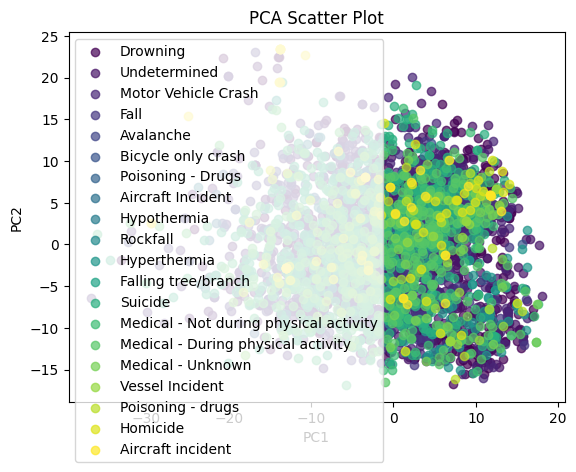

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Standardize the features (X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)
# Get unique categories
unique_categories = y['Cause of Death'].unique()

# Assign a color to each unique category
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_categories)))

# Create a dictionary to map categories to colors
category_to_color = dict(zip(unique_categories, colors))

# Plot the scatter plot
for category, color in category_to_color.items():
    indices = y['Cause of Death'] == category
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], color=color, label=category, alpha=0.7)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatter Plot')
plt.legend()
plt.show()

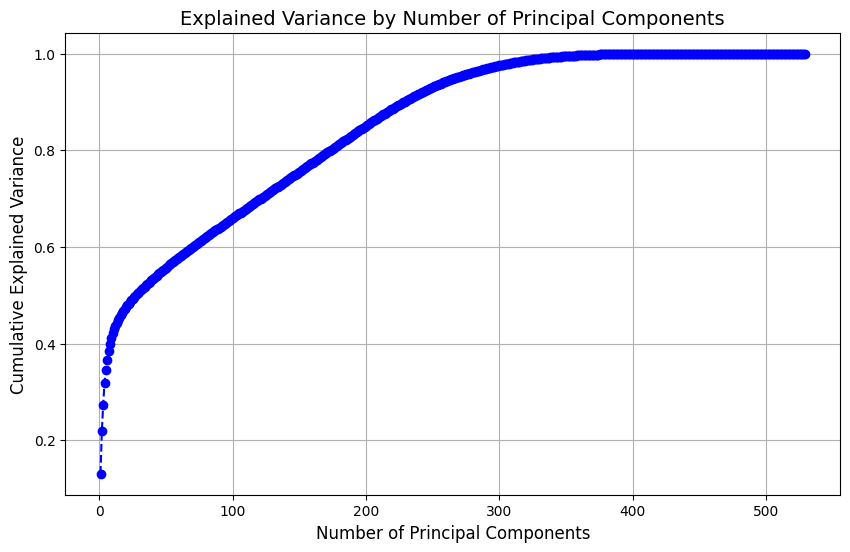

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fit PCA on the standardized features
pca_full = PCA()
pca_full.fit(X_scaled)

# Calculate the cumulative explained variance ratio
cumulative_variance = pca_full.explained_variance_ratio_.cumsum()

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Explained Variance by Number of Principal Components', fontsize=14)
plt.xlabel('Number of Principal Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.grid()
plt.show()


Lets use the top 300 components! This will give us 

The top 300 PCA components explain 97.54% of the original variance.


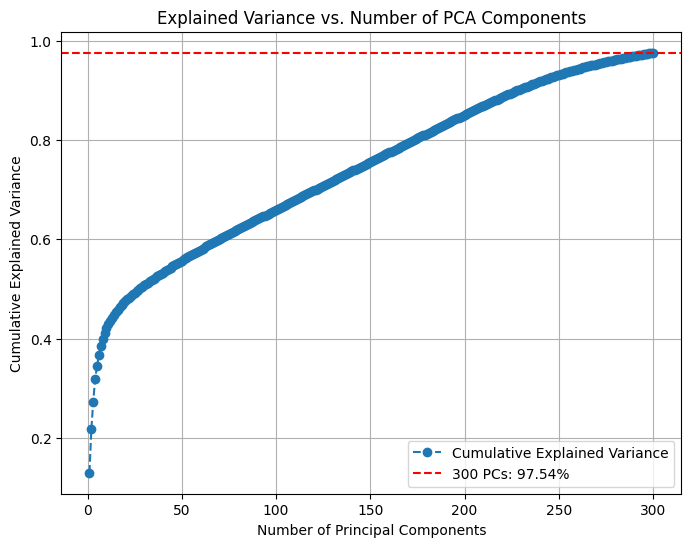

In [11]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Fit PCA
pca = PCA(n_components=300, random_state=42)
pca.fit(X_scaled)

# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
variance_300 = cumulative_variance[-1]  # Variance captured by the top 300 components

print(f"The top 300 PCA components explain {variance_300:.2%} of the original variance.")

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, 301), cumulative_variance, marker='o', linestyle='--', label='Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of PCA Components')
plt.axhline(variance_300, color='r', linestyle='--', label=f'300 PCs: {variance_300:.2%}')
plt.legend()
plt.grid()
plt.show()


In [12]:
from sklearn.decomposition import PCA

# Fit PCA and transform the data
pca = PCA(n_components=300, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Now X_pca contains only the top 300 PCA components
print(X_pca.shape)  # Verify dimensions (should be rows x 300)


(4442, 300)


In [13]:




# Encode the target variable
from sklearn.preprocessing import LabelEncoder
y_encoded = LabelEncoder().fit_transform(y)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of trees (n_estimators)
rf.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = rf.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


C:\Users\spenc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score: 0.4465691788526434

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       1.00      0.67      0.80         9
           2       1.00      0.50      0.67         8
           3       1.00      0.00      0.00         4
           4       0.48      0.73      0.58       169
           5       0.40      0.58      0.47        98
           6       1.00      0.00      0.00         4
           7       0.00      0.00      0.00        10
           8       0.67      0.12      0.21        16
           9       0.38      0.33      0.35         9
          10       0.35      0.14      0.20        64
          11       0.25      0.10      0.15        48
          12       0.00      0.00      0.00        16
          13       0.49      0.70      0.57       164
          14       1.00      0.00      0.00         4
          15       1.00      0.00      0.00         5
          16       1.

In [14]:
# Logistic Regression (Multiclass)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)  # Adjust max_iter if needed
log_reg.fit(X_train, y_train)

# Evaluate Logistic Regression
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")
print(classification_report(y_test, y_pred_log_reg))
print(confusion_matrix(y_test, y_pred_log_reg))

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)  # Adjust 'n_neighbors' to tune performance
knn.fit(X_train, y_train)

# Evaluate KNN
y_pred_knn = knn.predict(X_test)
print("\nKNN Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))

C:\Users\spenc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Results:
Accuracy: 0.41732283464566927
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.46      0.67      0.55         9
           2       0.36      0.62      0.45         8
           3       0.00      0.00      0.00         4
           4       0.55      0.64      0.59       169
           5       0.41      0.42      0.42        98
           6       0.00      0.00      0.00         4
           7       0.14      0.10      0.12        10
           8       0.33      0.31      0.32        16
           9       0.25      0.33      0.29         9
          10       0.24      0.19      0.21        64
          11       0.34      0.31      0.33        48
          12       0.05      0.06      0.05        16
          13       0.51      0.56      0.53       164
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         5
          16       0.0

C:\Users\spenc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\spenc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\spenc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

In [15]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression with Ridge regularization
ridge_log_reg = LogisticRegression(penalty='l2', solver='lbfgs', multi_class='multinomial', max_iter=1000, random_state=42)
ridge_log_reg.fit(X_train, y_train)

# Evaluate Ridge Logistic Regression
y_pred_ridge = ridge_log_reg.predict(X_test)
print("Ridge Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ridge)}")
print(classification_report(y_test, y_pred_ridge))


C:\Users\spenc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Ridge Logistic Regression Results:
Accuracy: 0.41732283464566927
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.46      0.67      0.55         9
           2       0.36      0.62      0.45         8
           3       0.00      0.00      0.00         4
           4       0.55      0.64      0.59       169
           5       0.41      0.42      0.42        98
           6       0.00      0.00      0.00         4
           7       0.14      0.10      0.12        10
           8       0.33      0.31      0.32        16
           9       0.25      0.33      0.29         9
          10       0.24      0.19      0.21        64
          11       0.34      0.31      0.33        48
          12       0.05      0.06      0.05        16
          13       0.51      0.56      0.53       164
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         5
          16    

Cluster Analysis!!

In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X_scaled)
y_kmeans = kmeans.predict(X_scaled)

In [17]:
kmeans.inertia_

2056062.8340904876

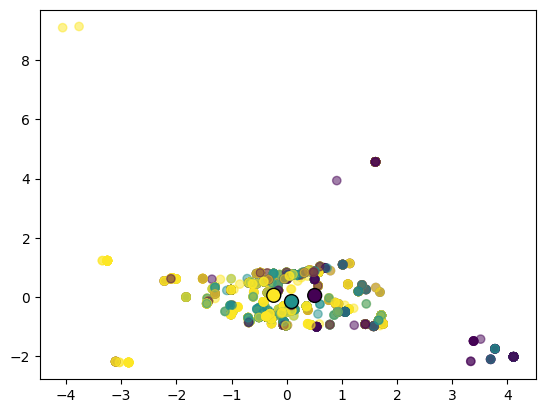

In [18]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y_kmeans, cmap='viridis',alpha=.5)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c=np.arange(0,3),cmap='viridis', s=100,edgecolors='black')

In [19]:
# Compute WCSS for different numbers of clusters
kmeans_per_k = [KMeans(n_clusters=k, n_init='auto', random_state=42).fit(X_scaled)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

Text(0, 0.5, 'WCSS')

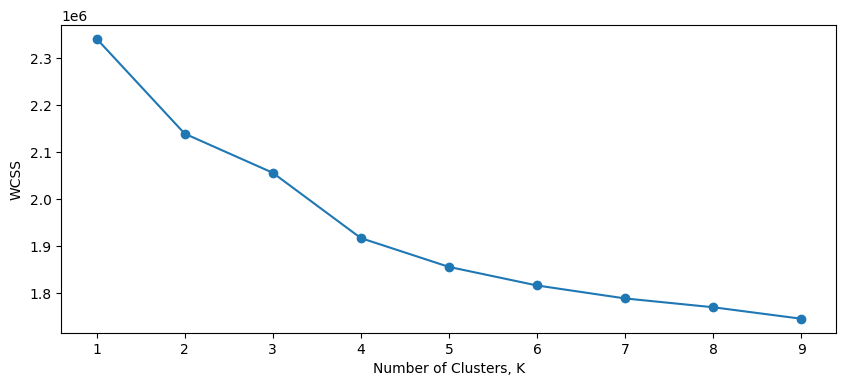

In [20]:
plt.figure(figsize=(10,4))
plt.plot(np.arange(len(inertias))+1,inertias,marker="o")
plt.xlabel('Number of Clusters, K')
plt.ylabel('WCSS')

Looking at this within-cluster sum-of-squares (WCSS) graph, I believe the best elbow is around 4. I see a significant Elbow there, so we will stick with 4 groups. This graph is really interesting to me, however, in a the greater context, as we know there are actually 20 groups. I think the main thing I learned from this, is that we did not tell the computer our real objective (the classifications we already set), so it would be highly suprising if our model was able to just guess our classifications.

In [21]:
from plot_silhouette import plot_silhouette_scores
from sklearn.metrics import silhouette_score, silhouette_samples

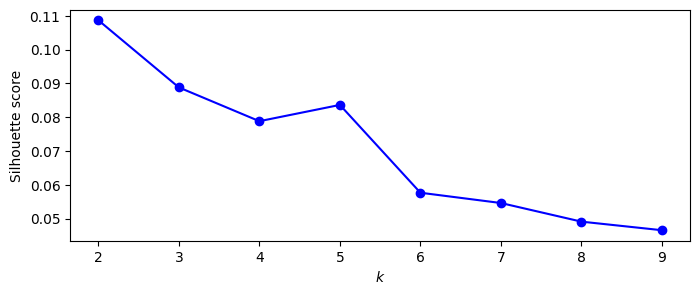

In [22]:


silhouette_scores = [silhouette_score(X_scaled, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.show()

Looking at the Silhouette scores, 4 is still reasonable, though obviously 2 clusters would be the best. 

Class Imbalances!!

Start simple with ada boosting

In [23]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree as the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)

# Create an AdaBoostClassifier with the base estimator
clf = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, learning_rate=1)

# Fit the model to your data
clf.fit(X_train, y_train)

C:\Users\spenc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1)

In [24]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.2215973003374578
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         4
           4       0.32      0.51      0.39       169
           5       0.00      0.00      0.00        98
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00        16
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00        64
          11       0.00      0.00      0.00        48
          12       0.00      0.00      0.00        16
          13       0.23      0.02      0.03       164
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         

C:\Users\spenc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\spenc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\spenc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

Wow, it is interesting how ada boosting really destroyed the accuracy of the model before, because it is overweighting the lesser recognized classes, but they are difficult to detect still.

Now I wanted to use ADASYN (Adaptive Synthetic Sampling)!! 

In [63]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   --- ----------------------------------- 20.5/258.3 kB 640.0 kB/s eta 0:00:01
   --------- ----------------------------- 61.4/258.3 kB 812.7 kB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 2.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\spenc\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Okay we need to fix the class imbalance... so we will remove all classes with less than 20 observations

In [40]:
from imblearn.over_sampling import SMOTE

# Assuming X_train and y_train are your training data
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# Now, you can train your model on the resampled data:
rf.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [41]:
# Evaluate Ridge Logistic Regression
y_rf = rf.predict(X_test)
print("Ridge Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_rf)}")
print(classification_report(y_test, y_rf))

Ridge Logistic Regression Results:
Accuracy: 0.4251968503937008
              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.75      0.67      0.71         9
           2       0.71      0.62      0.67         8
           3       0.00      0.00      0.00         4
           4       0.54      0.67      0.60       169
           5       0.41      0.49      0.45        98
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00        10
           8       0.44      0.44      0.44        16
           9       0.25      0.44      0.32         9
          10       0.20      0.16      0.17        64
          11       0.20      0.23      0.21        48
          12       0.06      0.06      0.06        16
          13       0.56      0.63      0.59       164
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         5
          16     

In [38]:
from imblearn.combine import SMOTEENN
import pandas as pd


# Apply SMOTEENN to the balanced dataset
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

# Now, you can train your model on the resampled data:
rf.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [39]:
# Evaluate Ridge Logistic Regression
y_rf = rf.predict(X_test)
print("Ridge Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_rf)}")
print(classification_report(y_test, y_rf))


Ridge Logistic Regression Results:
Accuracy: 0.21147356580427445
              precision    recall  f1-score   support

           0       0.30      0.60      0.40         5
           1       0.20      0.67      0.31         9
           2       0.28      0.62      0.38         8
           3       0.00      0.00      0.00         4
           4       0.52      0.17      0.25       169
           5       0.39      0.29      0.33        98
           6       0.11      0.25      0.15         4
           7       0.03      0.20      0.05        10
           8       0.19      0.56      0.29        16
           9       0.08      0.44      0.13         9
          10       0.08      0.14      0.10        64
          11       0.13      0.40      0.20        48
          12       0.02      0.06      0.02        16
          13       0.73      0.23      0.35       164
          14       0.05      0.25      0.08         4
          15       0.00      0.00      0.00         5
          16    

As you can see, the normal SMOTE has about the same accuracy as the traditional Random Forrest. The second did much worse, so we will hyperparameterize random forrest, and hopefully get our best accuracy yet!

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_